# The Libraries

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import regex as re
import warnings


# Library for downloading the dataset
import arff

# Visualisation Libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap 
import seaborn as sns
import plotly.graph_objs as go

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


# Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

#Color Palette
color1='#4a86e8'
color2='#ffd966'
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color1,color2])
custom_cmap2 =  [color1,color2]

# EDA

### Basic File Checks

Analysing the Columns content and size

In [3]:
def view_data(data): 
    print(f"Data has {data.shape[0]} rows and {data.shape[1]} columns with these data types:")
    print()
    print(data.dtypes)
    print()
    print("Data row sample and full columns:")
    return data.sample(5)

Checking for duplicated and empty data

In [4]:
def check_data(data): # sum & returns duplicates, NaN & empty spaces
    duplications = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    print(f"There are {duplications} duplicate rows, {nan_values.values.sum()} empty rows and {empty_spaces.values.sum()} empty spaces")
    if duplications > 0:
        print("Duplicate Rows:")
        print(data[data.duplicated(keep=False)])
    if nan_values.values.sum() > 0:
        print("NaN Rows:")
        for x in nan_values[nan_values > 0].index:
            perc = str(round(df[x].isna().sum() / len(df) * 100, 2))
            print(f"{perc}% of NaNs in the {x} column")
    if empty_spaces.values.sum() > 0:
        print("Empty Rows:")
  

### Uploading the titanic dataset

In [5]:
#https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

import pandas as pd

# Use liac-arff to read the ARFF file
with open('titanic.arff', 'r') as file:
    arff_content = arff.load(file)

# Extract data and attributes
data = arff_content['data']
attribute_names = [attribute[0] for attribute in arff_content['attributes']]

# Create a pandas DataFrame
df = pd.DataFrame(data, columns=attribute_names)

# Convert DataFrame to CSV
df.to_csv('output.csv', index=False)

In [6]:
file_path = "output.csv"
data = pd.read_csv(file_path)
df = data.copy()

In [7]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [8]:
view_data(df)

Data has 1309 rows and 14 columns with these data types:

pclass       float64
survived       int64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Data row sample and full columns:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
978,3.00,1,"Lulic, Mr. Nikola",male,27.00,0.00,0.00,315098,8.66,NaN,S,15,NaN,NaN
727,3.00,0,"Connors, Mr. Patrick",male,70.50,0.00,0.00,370369,7.75,NaN,Q,NaN,171.00,NaN
33,1.00,1,"Bonnell, Miss. Elizabeth",female,58.00,0.00,0.00,113783,26.55,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio"
963,3.00,0,"Leonard, Mr. Lionel",male,36.00,0.00,0.00,LINE,0.00,NaN,S,NaN,NaN,NaN
892,3.00,0,"Johansson, Mr. Karl Johan",male,31.00,0.00,0.00,347063,7.78,NaN,S,NaN,NaN,NaN


In [9]:
check_data(df)

There are 0 duplicate rows, 3855 empty rows and 0 empty spaces
NaN Rows:
20.09% of NaNs in the age column
0.08% of NaNs in the fare column
77.46% of NaNs in the cabin column
0.15% of NaNs in the embarked column
62.87% of NaNs in the boat column
90.76% of NaNs in the body column
43.09% of NaNs in the home.dest column


In [10]:
df_perc = df.copy()

In [11]:
target = df_perc['survived']
df_perc = df_perc.drop('survived', axis=1)
df_perc = pd.concat([df_perc, target], axis=1)
# Calculate the percentage of missing values for each column
perc_missing = df.isna().mean() * 100

# Create a new DataFrame with one row containing these percentages
df_table = pd.DataFrame(perc_missing).T

# Rename the row index to improve clarity
df_table.index = ['Percent Missing']

print(df_table)

                 pclass  survived  name  sex   age  sibsp  parch  ticket  \
Percent Missing    0.00      0.00  0.00 0.00 20.09   0.00   0.00    0.00   

                 fare  cabin  embarked  boat  body  home.dest  
Percent Missing  0.08  77.46      0.15 62.87 90.76      43.09  


In [12]:
df_table.iloc[0].values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.00916730e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.63941940e-02, 7.74637128e+01, 1.52788388e-01, 6.28724217e+01,
       9.07563025e+01, 4.30863254e+01])

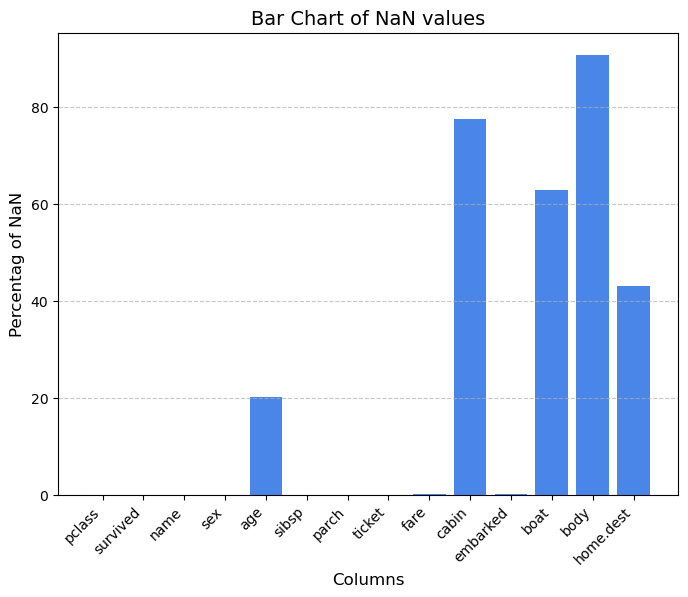

In [13]:
import matplotlib.pyplot as plt

# Sample data
categories = list(df_table.keys())
values = df_table.iloc[0].values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=color1)

# Add titles and labels
plt.title('Bar Chart of NaN values', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentag of NaN', fontsize=12)
plt.xticks(rotation=45, ha='right') 

# Show grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### Dropping columns

In [14]:
# dropping unnessary columns
df.drop(['boat', 'ticket', 'body', 'home.dest'], axis=1, inplace=True)

### Separating Numeric and Categoric Columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   float64
 6   parch     1309 non-null   float64
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 102.4+ KB


### Can we drop 20% of empty age rows? Or rather the age column?

In [16]:
df[df.age.isna()].groupby('pclass').size()

pclass
1.00     39
2.00     16
3.00    208
dtype: int64

In [17]:
df[df.age.isna()].groupby(['pclass','survived']).size()

pclass  survived
1.00    0            20
        1            19
2.00    0            12
        1             4
3.00    0           158
        1            50
dtype: int64

### No, we cannot drop age. It seems important.

### Can we drop the empty fare rows? Yes, as is just 1

In [18]:
df[df.fare.isna()]

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
1225,3.00,0,"Storey, Mr. Thomas",male,60.50,0.00,0.00,NaN,NaN,S


In [19]:
df = df.dropna(subset=['fare'])

### Can we drop the empty embarked rows? Yes, as is just 2

In [20]:
df[df.embarked.isna()]

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
168,1.00,1,"Icard, Miss. Amelie",female,38.00,0.00,0.00,80.00,B28,NaN
284,1.00,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0.00,0.00,80.00,B28,NaN


In [21]:
df = df.dropna(subset=['embarked'])

In [22]:
df_short = df.drop(['embarked', 'name', 'cabin', 'age'], axis=1)
df_grouping = df

In [23]:
check_data(df_grouping)

There are 0 duplicate rows, 1276 empty rows and 0 empty spaces
NaN Rows:
20.14% of NaNs in the age column
77.57% of NaNs in the cabin column


### Transforming Cabin

In [24]:
df["cabin"].value_counts()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
B96 B98            4
F33                4
                  ..
F E46              1
F E57              1
F E69              1
E10                1
F38                1
Name: count, Length: 185, dtype: int64

In [25]:
df["cabin"] = df["cabin"].apply(lambda x: x[0] if isinstance(x, str) else "M")

In [26]:
df.cabin.value_counts()

cabin
M    1013
C      94
B      63
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [27]:
cabin_map = {'A': 8,
             'B': 7,
             'C': 6,
             'D': 5,
             'E': 4,
             'F': 3,
             'G': 2,
             'T': 1,
             'M': 0}

In [28]:
df["cabin_enc"] = df["cabin"].map(cabin_map)
df = df.drop(columns=["cabin"])
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,cabin_enc
0,1.00,1,"Allen, Miss. Elisabeth Walton",female,29.00,0.00,0.00,211.34,S,7
1,1.00,1,"Allison, Master. Hudson Trevor",male,0.92,1.00,2.00,151.55,S,6


### Transforming Embarked

In [29]:
df.embarked.value_counts()

embarked
S    913
C    270
Q    123
Name: count, dtype: int64

In [30]:
embarked_dummies = pd.get_dummies(df["embarked"], prefix="embarked", dtype=int)

In [31]:
embarked_dummies.head(2)

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,0,0,1


In [32]:
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(columns="embarked")

### Transforming Title/Name

In [33]:
def extract_title(name):
    chunks = name.split(",")
    return chunks[1].split(".")[0].strip()

In [34]:
df["title"] = df["name"].apply(extract_title)

In [35]:
df["title"].value_counts()

title
Mr              756
Miss            259
Mrs             196
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Lady              1
Capt              1
Mme               1
Sir               1
Jonkheer          1
Dona              1
Don               1
the Countess      1
Name: count, dtype: int64

In [36]:
# Identify the top 4 titles
top_4_titles = df["title"].value_counts().nlargest(4).index

# Replace titles not in the top 4 with "Others"
df["title"] = df["title"].apply(lambda x: x if x in top_4_titles else "Others")

# Verify the changes
df["title"].value_counts()

title
Mr        756
Miss      259
Mrs       196
Master     61
Others     34
Name: count, dtype: int64

In [37]:
titles_dummies = pd.get_dummies(df["title"], prefix="title", dtype=int)
df = pd.concat([df, titles_dummies], axis=1)
df.drop(columns="name", inplace=True)

### Transforming Age

In [38]:
df.groupby("title")["age"].median().round(2)

title
Master    4.00
Miss     22.00
Mr       29.00
Mrs      35.00
Others   44.50
Name: age, dtype: float64

In [39]:
keys = df.groupby("title")["age"].mean().round(2).index
values = df.groupby("title")["age"].mean().round(2).values

mean_ages = {key: float(value) for key, value in zip(keys, values)}

In [40]:
mean_ages

{'Master': 5.48, 'Miss': 21.7, 'Mr': 32.2, 'Mrs': 36.85, 'Others': 42.66}

In [41]:
age_by_title = df["title"].map(mean_ages)
df["age"] = df["age"].fillna(age_by_title)
df = df.drop(columns="title")

### Gender encoding

In [42]:
# sex encoding
df["sex_enc"] = df["sex"].map({"male": 0, "female": 1})
df.drop(columns="sex", inplace=True)
df.head(3)

,pclass,survived,age,sibsp,parch,fare,cabin_enc,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Others,sex_enc
0,1.00,1,29.00,0.00,0.00,211.34,7,0,0,1,0,1,0,0,0,1
1,1.00,1,0.92,1.00,2.00,151.55,6,0,0,1,1,0,0,0,0,0
2,1.00,0,2.00,1.00,2.00,151.55,6,0,0,1,0,1,0,0,0,1


In [43]:
view_data(df)

Data has 1306 rows and 16 columns with these data types:

pclass          float64
survived          int64
age             float64
sibsp           float64
parch           float64
fare            float64
cabin_enc         int64
embarked_C        int64
embarked_Q        int64
embarked_S        int64
title_Master      int64
title_Miss        int64
title_Mr          int64
title_Mrs         int64
title_Others      int64
sex_enc           int64
dtype: object

Data row sample and full columns:


,pclass,survived,age,sibsp,parch,fare,cabin_enc,embarked_C,embarked_Q,embarked_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Others,sex_enc
693,3.00,1,21.00,0.00,0.00,7.82,0,0,1,0,0,0,1,0,0,0
260,1.00,1,40.00,0.00,0.00,153.46,6,0,0,1,0,1,0,0,0,1
645,3.00,1,23.00,0.00,0.00,7.80,0,0,0,1,0,0,1,0,0,0
344,2.00,1,19.00,0.00,0.00,13.00,0,0,0,1,0,1,0,0,0,1
305,1.00,0,60.00,0.00,0.00,26.55,0,0,0,1,0,0,0,0,1,0


In [44]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

### Separating numerical and categorical

In [45]:
cat = df_grouping.select_dtypes(include="object")
num = df_grouping.select_dtypes(include="number") # creating a numerical dataframe
cat_num = num.loc[:, num.nunique() < 18] # categorical values taken from the numerical dataframe
num = num.drop(columns=cat_num.columns) # dropping the categorical values from the numerical dataframe
cat = pd.concat([cat, cat_num], axis=1) # adding the categorical values to the categorical dataframe

In [46]:
len(cat.columns), len(num.columns),    len(df_grouping.columns)

(9, 2, 11)

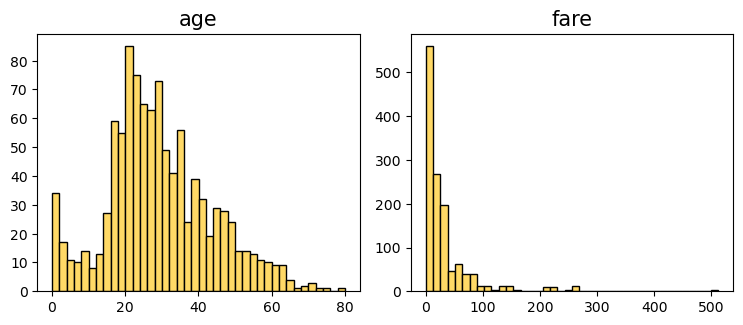

In [47]:
nrows, ncols = 4,4 # how many subplots per row and column

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

axes = axes.flatten() #it converts the array from a shape of 2D (nrows, ncols) to a shape of 1D(nrows*ncols,)


for i, ax in enumerate(axes): #i is getting the index, ax the axis object
    if i >= len(num.columns):  # avoids showing empty plots (e.g. above we have 16 suplots but only 13 columns)
        ax.set_visible(False) 
        continue                
    ax.hist(num.iloc[:, i], bins=40, color=color2, edgecolor='black')
    ax.set_title(num.columns[i], fontsize=15)

plt.tight_layout()
plt.show()

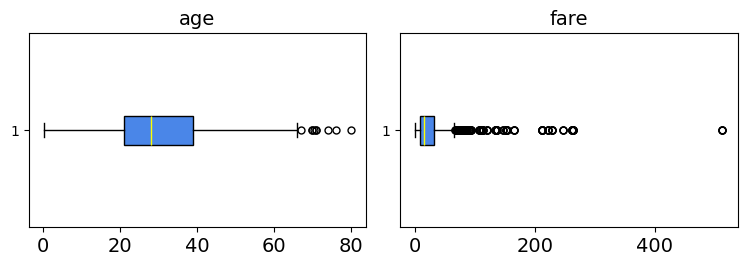

In [48]:
nrows, ncols = 5, 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(
        num.iloc[:, i].dropna(), vert=False, patch_artist=True,
        boxprops={'facecolor': color1, 'color': 'black'},  # Correct usage here
        medianprops={'color': 'yellow'},
        whiskerprops={'color': 'black'},
        capprops={'color': 'black'},
        flierprops={'marker': 'o', 'color': 'red', 'markersize': 5}
    )
    ax.set_title(num.columns[i], fontsize=14)
    ax.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.show()

In [49]:
num.age.median()

28.0

In [50]:
num.fare.median()

14.4542

In [51]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1043.00,29.81,14.37,0.17,21.00,28.00,39.00,80.00
fare,1306.00,33.22,51.77,0.00,7.90,14.45,31.27,512.33


### Correlations Numerical

In [52]:
# adding the target column to the numerical dataframe
num = pd.concat([num, df["survived"]], axis=1)

In [53]:
print(f"Pearson/linear correlation of survival with age {df.survived.corr(df.age):.2f}, survival with fare: {df.survived.corr(df.fare):.2f} and fare with age: {df.fare.corr(df.age):.2f}")

Pearson/linear correlation of survival with age -0.07, survival with fare: 0.24 and fare with age: 0.17


### Correlations Categorical

In [54]:
cat.columns

Index(['name', 'sex', 'cabin', 'embarked', 'pclass', 'survived', 'sibsp',
       'parch', 'cabin_enc'],
      dtype='object')

In [55]:
cat.sex.value_counts()

sex
male      842
female    464
Name: count, dtype: int64

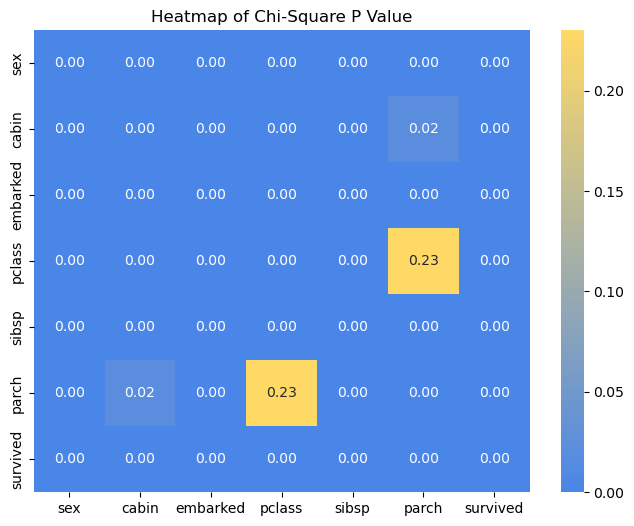

In [56]:
# creating the table manually
cat_columns = ['sex', 'cabin', 'embarked', 'pclass','sibsp',
       'parch','survived']
corr_mat_chi = {}
for i in cat_columns:
    # inner dictionary for each column i
    corr_mat_chi[i] = {}
    for j in cat_columns:
       _, pvalue,_,_ = chi2_contingency(pd.crosstab(cat[i], cat[j]))
       corr_mat_chi[i][j] = round(pvalue,2)
df_table = pd.DataFrame(corr_mat_chi)
 # heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_table, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title('Heatmap of Chi-Square P Value')
plt.show()



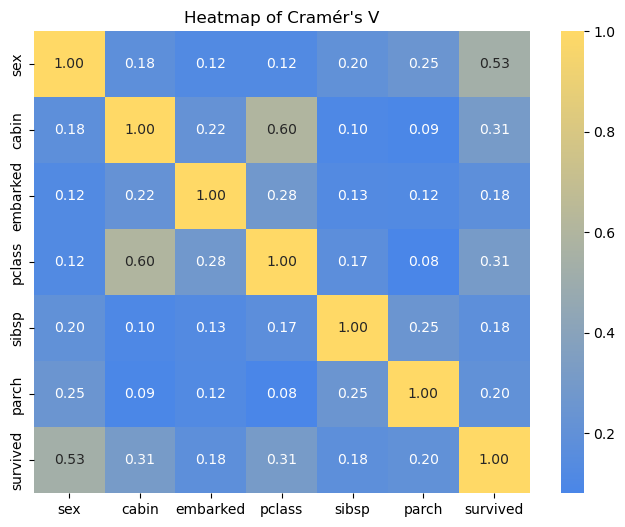

In [57]:
# creating the table manually
cat_columns = ['sex', 'cabin', 'embarked', 'pclass','sibsp',
       'parch','survived']
dict= {}
for i in cat_columns:
    # inner dictionary for each column i
    dict[i] = {}
    for j in cat_columns:
       cramer_v = association(pd.crosstab(cat[i], cat[j]), method='cramer')
       dict[i][j] = round(cramer_v,2)
df_table = pd.DataFrame(dict)

 # heatmap
plt.figure(figsize=(8,6))

sns.heatmap(df_table, annot=True, cmap=custom_cmap, fmt=".2f")
plt.title("Heatmap of Cramér's V")
plt.show()



In [58]:
result = pd.crosstab(df['pclass'], df['survived'])

# Machine Learning

### Set up X and Y test and train split

In [59]:
X = df.drop(columns="survived")
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 1306.
70% for training data: 914.
30% for test data: 392.


## Baseline Model: Logistic Regression

In [61]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [62]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

The `predictions` and `probabilities` arrays represent different aspects of the model's output:

1. **predictions**:
    - This array contains the predicted class labels for the test data. Each element in the array is either 0 or 1, representing the predicted class for each instance in the test set.
    - For example, `predictions = array([0, 0, 0, 0, 1, 1, ...])` means that the model predicts the first four instances belong to class 0, the fifth and sixth instances belong to class 1, and so on.

2. **probabilities**:
    - This array contains the predicted probabilities of the positive class (class 1) for the test data. Each element in the array is a float between 0 and 1, representing the model's confidence that the corresponding instance belongs to class 1.
    - For example, `probabilities = array([0.03955246, 0.09883243, 0.10945036, ...])` means that the model is 3.96% confident that the first instance belongs to class 1, 9.88% confident that the second instance belongs to class 1, and so on.

In summary, `predictions` provide the final class labels, while `probabilities` provide the confidence scores for the positive class.

In [63]:
eval_df = pd.DataFrame({"actual":y_test,"predictions":predictions, "probabilities":probabilities})
eval_df["correct"] = eval_df["actual"] == eval_df["predictions"]
eval_df.probabilities.describe()

count   392.00
mean      0.38
std       0.31
min       0.00
25%       0.09
50%       0.25
75%       0.66
max       0.97
Name: probabilities, dtype: float64

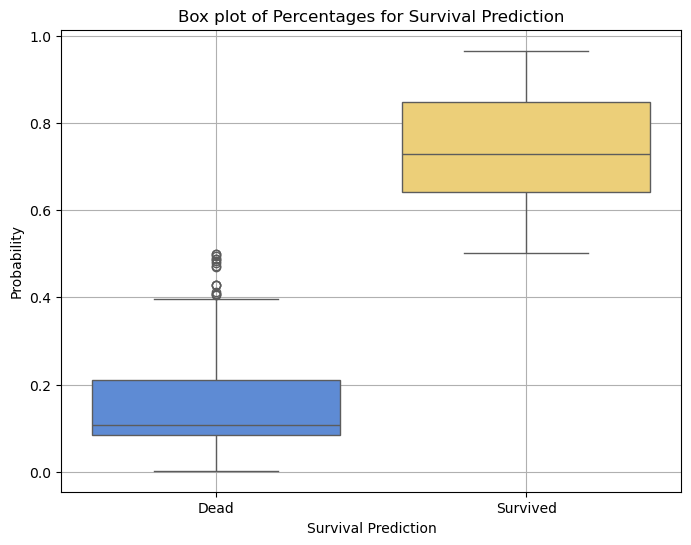

In [64]:
df_chart = eval_df.copy()
df_chart['predictions'] = df_chart['predictions'].map({0: 'Dead', 1: 'Survived'}) # making the chart more readable

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_chart, x="predictions", y="probabilities", palette=custom_cmap2)

plt.title('Box plot of Percentages for Survival Prediction')
plt.xlabel('Survival Prediction')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       239
           1       0.76      0.73      0.74       153

    accuracy                           0.80       392
   macro avg       0.79      0.79      0.79       392
weighted avg       0.80      0.80      0.80       392



- Precision: How many times is what my model says really true?
- Recall/Sensitivity: How many times is my model able to identify the truth?
- F1-score, which is the harmonic mean of precision and recall

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn + fp)
specificity

np.float64(0.8493723849372385)

In [ ]:
cloud = 

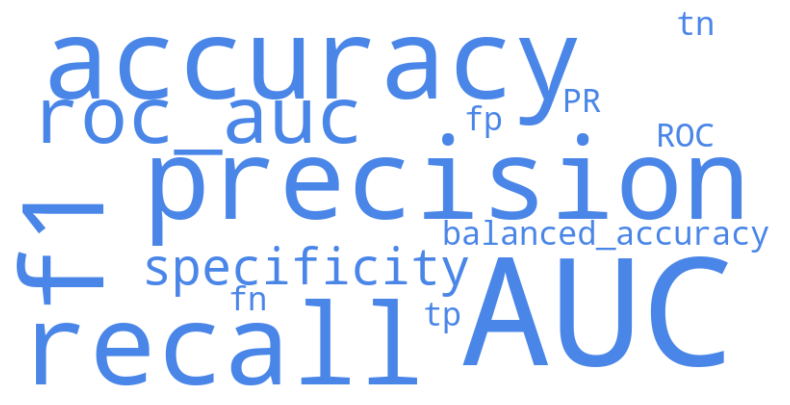

In [91]:
from wordcloud import WordCloud

#Creating a wordcloud to easier introduce the dataset to the team
text = 'accuracy, precision, recall, f1, roc_auc, specificity, balanced_accuracy, AUC-ROC, AUC-PR, tn, fp, fn, tp'
def single_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return color1

# Generate the word cloud with the custom single color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=single_color_func).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('What matters for diabetes?')
plt.axis('off')  # Hide the axes
plt.savefig("plots/wordcloud_all_columns.png")
plt.show()




    When to Use: Specificity should be prioritized when it's important to capture true negatives. This metric is crucial when the presence of a condition is to be ruled out with certainty.
    Example Scenario: Screening a rare disease in a large population, where it's important to identify those who definitely don't have the disease.


<Figure size 800x600 with 0 Axes>

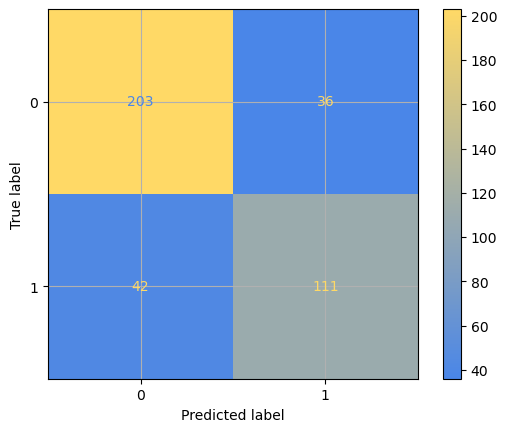

In [67]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap=custom_cmap)  
plt.grid(True)
plt.show()

In [68]:
# Retrieve the coefficient of each feature
coefficients = model.coef_

# Create a DataFrame to display the coefficients with feature names
# If you have multiple classes, iterate through them
for i, class_coefficients in enumerate(coefficients):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': class_coefficients
    })
    print(f"Class {i} Coefficients:")
    print(feature_importance)
    print("\n")

Class 0 Coefficients:
         Feature  Coefficient
0         pclass        -0.61
1            age        -0.02
2          sibsp        -0.40
3          parch        -0.37
4           fare         0.00
5      cabin_enc         0.13
6     embarked_c         0.94
7     embarked_q        -0.12
8     embarked_s         0.27
9   title_master         1.22
10    title_miss         0.24
11      title_mr        -1.27
12     title_mrs         0.91
13  title_others        -0.02
14       sex_enc         1.32




## K Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
model_kn = KNeighborsClassifier(n_neighbors=11)
model_kn.fit(X_train, y_train)
model_kn.predict(X_test)
predictions_kn = model.predict(X_test)

In [71]:
print(classification_report(y_test, predictions_kn))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       239
           1       0.76      0.73      0.74       153

    accuracy                           0.80       392
   macro avg       0.79      0.79      0.79       392
weighted avg       0.80      0.80      0.80       392



<Figure size 800x600 with 0 Axes>

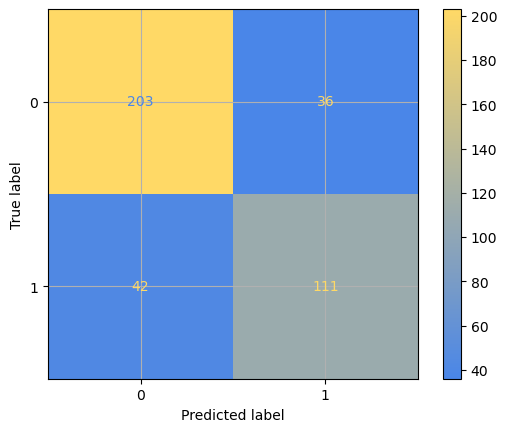

In [72]:
cm = confusion_matrix(y_test, predictions_kn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 6))
disp.plot(cmap=custom_cmap)  
plt.grid(True)
plt.show()

In [73]:
n_neighbors = range(1, 30)
test = []
train = []

for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

In [74]:
import plotly.graph_objs as go

In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(n_neighbors), y=train, name='Training Accuracy'))
fig.add_trace(go.Scatter(x=list(n_neighbors), y=test, name='Testing Accuracy'))
fig.update_layout(xaxis_title='Max Neighboors', yaxis_title='Accuracy', title='')
fig.show()

In [76]:
from lazypredict.Supervised import LazyClassifier
lpc = LazyClassifier(ignore_warnings=True)
models_lpc,predictions_lpc = lpc.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:01<00:00, 18.72it/s]

[LightGBM] [Info] Number of positive: 345, number of negative: 569
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 914, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377462 -> initscore=-0.500336
[LightGBM] [Info] Start training from score -0.500336


In [77]:
print(models_lpc)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.82               0.80     0.80      0.82   
NuSVC                              0.81               0.79     0.79      0.81   
KNeighborsClassifier               0.80               0.79     0.79      0.80   
LabelSpreading                     0.79               0.78     0.78      0.79   
XGBClassifier                      0.80               0.78     0.78      0.80   
CalibratedClassifierCV             0.80               0.78     0.78      0.80   
LinearSVC                          0.80               0.78     0.78      0.80   
LabelPropagation                   0.79               0.78     0.78      0.79   
LGBMClassifier                     0.79               0.78     0.78      0.79   
LogisticRegression                 0.79               0.78     0.78      0.79   
LinearDiscriminantAnalysis  

### GradientBoostingClassifier

In [78]:
X = df.drop(columns="survived")
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model_gbc.fit(X_train, y_train)
model_gbc.score(X_test, y_test)

0.8086734693877551

In [79]:
predictions_gbc = model_gbc.predict(X_test)
print(classification_report(y_test, predictions_gbc))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       239
           1       0.76      0.74      0.75       153

    accuracy                           0.81       392
   macro avg       0.80      0.80      0.80       392
weighted avg       0.81      0.81      0.81       392



In [80]:
print("Test data accuracy: ",model_gbc.score(X_test,y_test))

Test data accuracy:  0.8086734693877551


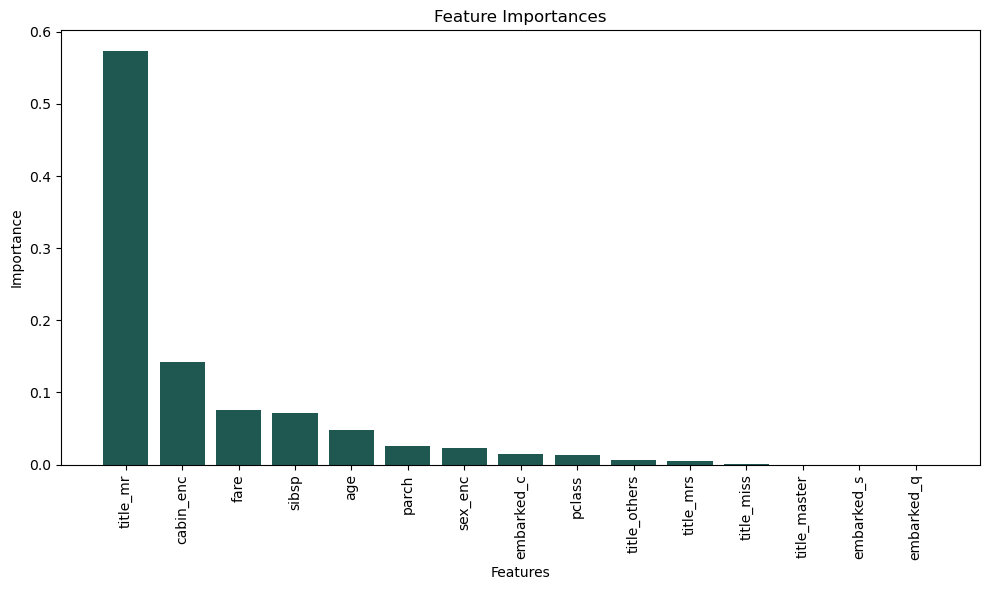

In [81]:
feature_names = list(X_train.columns)
importances = model_gbc.feature_importances_
indices = np.argsort(importances)[::-1] # sorts indices of importances in descending order

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='#1f5851')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Normalisation/Standardisation

I decided for the Normalisation of Fare (due to high outliers and exponential distribution) and the Standardisation of Age (as already not too far from a normal gaussian distribution)

In [82]:
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

In [83]:
df_scaled = df.copy()

In [84]:
df_scaled['age'] = scaler_standard.fit_transform(df[['age']])
df_scaled['fare'] = scaler_minmax.fit_transform(df[['fare']])

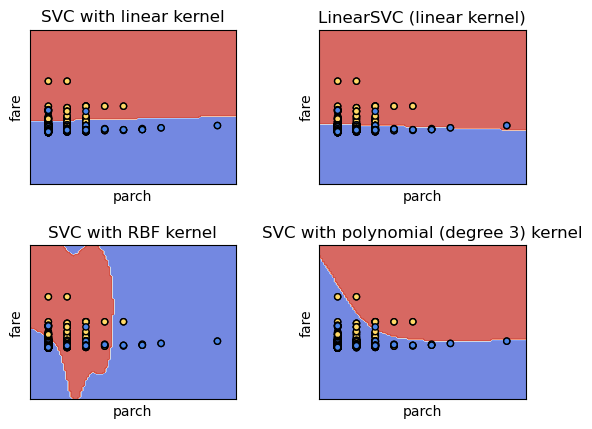

In [85]:
# Filter the dataset to only the first two classes (0 and 1, for example)
X = df_scaled[['parch', 'fare']].to_numpy()
y = df["survived"].to_numpy()


# SVM regularization parameter
C = 1.0  

# Create an instance of SVM and fit the data for different kernels
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='parch',
        ylabel='fare',
    )
    ax.scatter(X0, X1, c=y, cmap=custom_cmap, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [86]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler


# Filter the dataset to only the first two classes (0 and 1, for example)
X = df_new[['pclass', 'fare']].to_numpy()
y = df_new["survived"].to_numpy()


# SVM regularization parameter
C = 1.0  

# Create an instance of SVM and fit the data for different kernels
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='pclass',
        ylabel='fare',
    )
    ax.scatter(X0, X1, c=y, cmap=custom_cmap, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

NameError: name 'df_new' is not defined

# Class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#  Apply SMOTE only on training data
smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_oversampling).value_counts())

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
#  Apply SMOTE only on training data
tl = TomekLinks(sampling_strategy='majority')
X_train_undersampling, y_train_undersampling = tl.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_undersampling).value_counts())

## Less columns

In [ ]:
X2 = df2.drop(columns="survived")
y2 = df2["survived"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
fpr_kn, tpr_kn, thresholds_kn = roc_curve(y_test, predictions_kn)
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, predictions_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot(fpr_kn, tpr_kn, color='#d85408', lw=2, label='ROC curve KN')
plt.plot(fpr_gbc, tpr_gbc, color='#1f5851', lw=2, label='ROC curve GBC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
len(y_test)

In [ ]:
len(predictions)

In [ ]:
len(predictions_gbc)

In [ ]:
len(predictions_kn)

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "Gradient Boosting Classifier"],
    "Accuracy": [accuracy_score(y_test, predictions), accuracy_score(y_test, predictions_kn), accuracy_score(y_test, predictions_gbc)]
})

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler


# Filter the dataset to only the first two classes (0 and 1, for example)
X = df[['pclass', 'fare']].to_numpy()
y = df["survived"].to_numpy()


# SVM regularization parameter
C = 1.0  

# Create an instance of SVM and fit the data for different kernels
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Titles for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='pclass',
        ylabel='fare',
    )
    ax.scatter(X0, X1, c=y, cmap=custom_cmap, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()